In [ ]:
import Pkg
Pkg.activate("../.")
#Pkg.instantiate()

using Random
using Printf
using Graphs
using PyPlot
using Merits_of_curiosity_julia

Initial state: 14


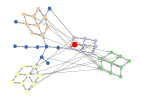

In [2]:
# Instantiate the environment with specified parameters
env = RoomEnvironment(
    n_init_states=13,
    branching_rate=0.5,
    room_size=3,
    p_room=4 / 13,
    p_sink=0.25,
    p_source=0.25,
    p_stoc=0.25,
    n_edges_per_sink=10,
    n_edges_per_source=10,
    uncontrollability=1.0
)

# Reset the environment to start a new episode
reset!(env)
println("Initial state: $(env.state)")
render(env)

In [3]:
# Create an agent
ε = 1/env.n_tot_states
l_i = 0.9
b_i = 1.0
intrinsic_type = "novelty"
T_PS = env.n_tot_states
agent = create_intr_ag_from_env(ε, l_i, b_i, intrinsic_type, env, T_PS);

In [4]:
# Run the agent and evaluate its performance
n_steps = 1000
measure = "state_discovery"
eval_every = 10


perfs = []
for is in 1:div(n_steps,eval_every)
    # Run step_size steps
    agent, _ = run_step(agent, env, eval_every, (is-1)*eval_every)
    # Store partial measure
    push!(perfs, partial_measure(agent, env, measure))
end
perfs

100-element Vector{Any}:
 0.8444444444444444
 0.7555555555555555
 0.6444444444444445
 0.5555555555555556
 0.5111111111111111
 0.5111111111111111
 0.4888888888888889
 0.4888888888888889
 0.4888888888888889
 0.4666666666666667
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

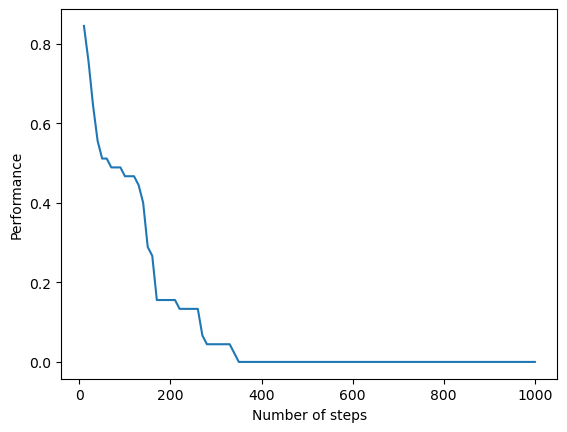

In [5]:
# Plot the results
plot([s*eval_every for s in 1:div(n_steps, eval_every)], perfs)
xlabel("Number of steps")
ylabel("Performance")
display(gcf())
close()